In [132]:
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import acquire
import prepare

In [3]:
titanic = prepare.prep_titanic()

In [4]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [5]:
titanic.survived.value_counts()
# the mode is o == no

0    549
1    342
Name: survived, dtype: int64

In [6]:
titanic['baseline'] = 0

In [7]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
0,0,3,22.0,1,0,7.2500,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,0


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
baseline_accuracy = accuracy_score(titanic.survived, 
                                   titanic.baseline)
baseline_accuracy

0.6161616161616161

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
t_train, t_test, t_val = prepare.split_data(titanic, 'survived')
t_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
474,0,3,22.000000,0,0,9.8375,1,0,0,1,0
370,1,1,25.000000,1,0,55.4417,0,1,0,0,0
573,1,3,29.699118,0,0,7.7500,1,0,1,0,0
110,0,1,47.000000,0,0,52.0000,1,1,0,1,0
167,0,3,45.000000,1,4,27.9000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,28.500000,0,0,16.1000,1,1,0,1,0
163,0,3,17.000000,0,0,8.6625,1,1,0,1,0
770,0,3,24.000000,0,0,9.5000,1,1,0,1,0
196,0,3,29.699118,0,0,7.7500,1,1,1,0,0


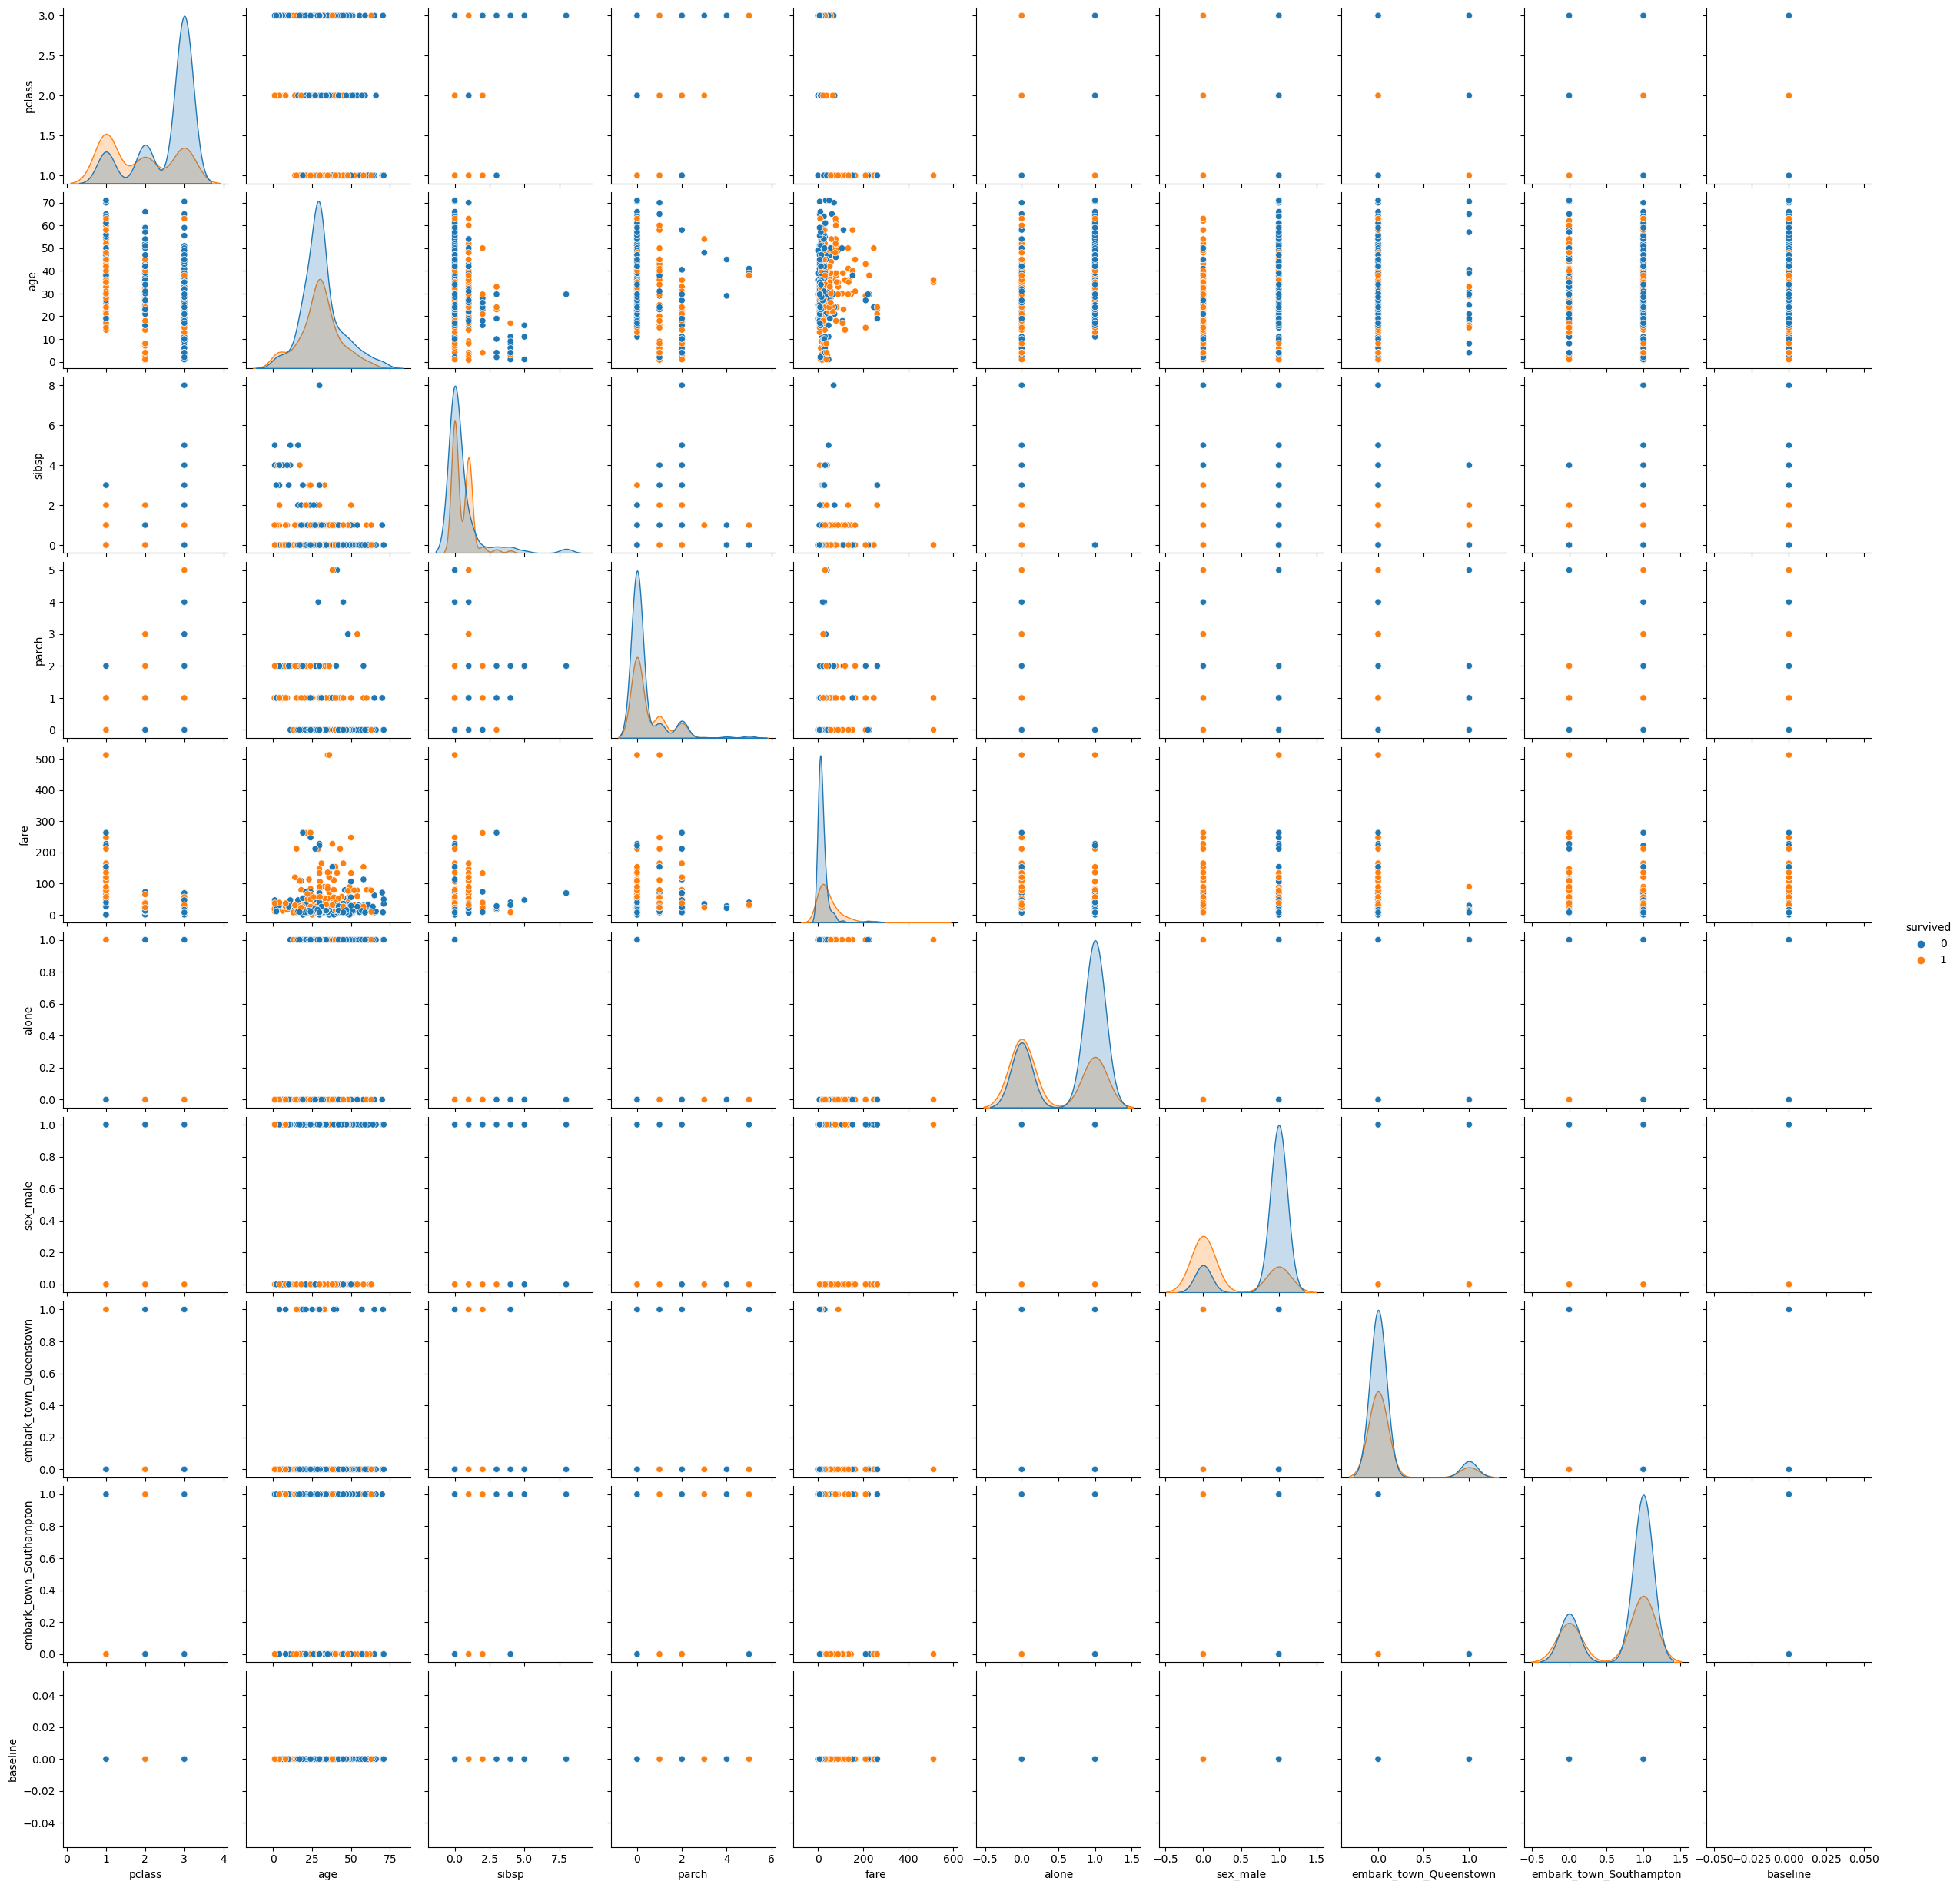

In [11]:
sns.pairplot(t_train, hue='survived')
plt.show()

### Modeling!

In [12]:
# Split so that X_cols holds only the data (clues) and y_cols holds the answers
X_cols = t_train.columns.to_list()
y_cols = 'survived'

In [13]:
# drop y_cols from X_cols
X_cols.remove('survived')

In [14]:
# Make the thing
clf = DecisionTreeClassifier()

In [15]:
# fit the thing 
clf.fit(t_train[X_cols], t_train[y_cols])

DecisionTreeClassifier()

In [16]:
model_1_preds = clf.predict(t_train[X_cols])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
# model score evaluation
clf.score(t_train[X_cols], t_train[y_cols])

0.9839357429718876

In [29]:
# confusion matrix
pd.DataFrame(confusion_matrix(t_train[y_cols], model_1_preds))

,0,1
0,306,1
1,7,184


In [137]:
rubric = pd.DataFrame(
{'pred_0': ['True Positive', 'False Negative'],
'pred_1': ['False Positive', 'True Negative']
}, index=['actual_0', 'actual_1'])

In [138]:
conf = confusion_matrix(t_train[y_cols], model_1_preds)

In [139]:
rubric + ': ' + conf.astype(str)

,pred_0,pred_1
actual_0,True Positive: 306,False Positive: 1
actual_1,False Negative: 7,True Negative: 184


In [30]:
tn, fp, fn, tp = confusion_matrix(t_train[y_cols], model_1_preds).ravel()

In [35]:
print(f'For Decision Tree Model 1:\nTrue Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}')

For Decision Tree Model 1:
True Negatives: 306
False Positives: 1
False Negatives: 7
True Positives: 184


In [82]:
# classification report for Decision Tree Model 1
model_1_classification_report = pd.DataFrame(classification_report(t_train[y_cols], model_1_preds, output_dict=True))
model_1_classification_report

,0,1,accuracy,macro avg,weighted avg
precision,0.977636,0.994595,0.983936,0.986115,0.984140
recall,0.996743,0.963351,0.983936,0.980047,0.983936
f1-score,0.987097,0.978723,0.983936,0.982910,0.983885
support,307.000000,191.000000,0.983936,498.000000,498.000000


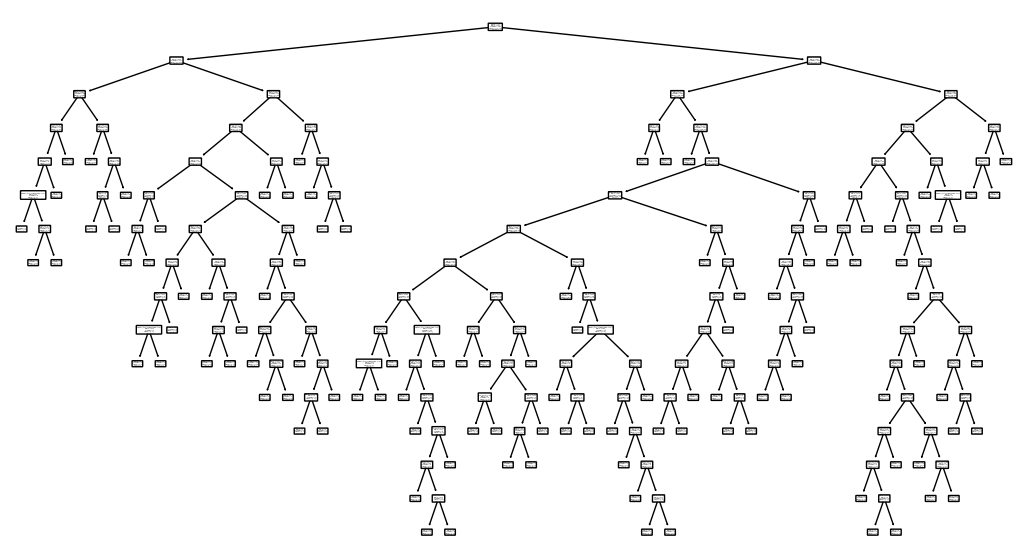

In [49]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=t_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()
#LOL

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [50]:
model_1_accuracy = accuracy_score(t_train[y_cols], model_1_preds)

In [51]:
# Sensitivity (True Positive Rate)
model_1_sensitivity = tp / (tp + fn)

In [52]:
# False Positive Rate FP/FP+TN (wrongly predicted positves over all the actual negatives)
model_1_fpr = fp / (fp + tn)

In [53]:
# True Negative Rate (Negative Predictive Value)

# correctly predicted negatives over correctly predicted negatives plus wrongly predicted
# positives ( what we thought were neg but were actually pos )
model_1_npv = tn / (tn + fn)

In [54]:
# False Negative Rate (FN/FN+TP)
model_1_fnr = fn / (fn + tp)

In [55]:
# Precision (how model correctly predicted positive outcomes)
model_1_precision = tp / (tp + fp)

In [56]:
# Recall (how the model handled all positive outcomes)
model_1_recall = tp / (tp + fn)

In [59]:
# F1 Score (harmonic mean of precision and recall)
model_1_f1 = 2 * ((model_1_precision * model_1_recall) / (model_1_precision + model_1_recall))

In [72]:
precision, recall, f_measure, support = precision_recall_fscore_support(t_train[y_cols], model_1_preds)

In [73]:
# Support (count of values) 
# returns an array of [0, 1] seems like only of the y_true cols though
support

array([307, 191])

5. Run through steps 2-4 using a different max_depth value.

In [75]:
# So we'll make a second thing
clf2 = DecisionTreeClassifier(max_depth=4)

In [76]:
# Fit the second thing
clf2.fit(t_train[X_cols], t_train[y_cols])

DecisionTreeClassifier(max_depth=4)

In [77]:
# Use the second thing
model_2_preds = clf2.predict(t_train[X_cols])

In [80]:
model_2_classification_report = pd.DataFrame(classification_report(t_train[y_cols], model_2_preds, output_dict=True))

In [90]:
baseline_classification_report = pd.DataFrame(classification_report(t_train[y_cols], t_train['baseline'], output_dict=True))
print(baseline_classification_report)

                    0      1  accuracy   macro avg  weighted avg
precision    0.616466    0.0  0.616466    0.308233      0.380030
recall       1.000000    0.0  0.616466    0.500000      0.616466
f1-score     0.762733    0.0  0.616466    0.381366      0.470199
support    307.000000  191.0  0.616466  498.000000    498.000000


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Which model performs better on your in-sample data?

In [99]:
print(f' Decision Tree Model 1 Classification Report (no specified max depth)')
print('_____________________________________________________________________')
print()
print(model_1_classification_report)
print('_____________________________________________________________________')
print('_____________________________________________________________________')
print()
print(f'     Decision Tree Model 2 Classification Report (max depth = 4)')
print('_____________________________________________________________________')
print()
print(model_2_classification_report)
print('_____________________________________________________________________')
print('_____________________________________________________________________')
print()
print(f'              Baseline Model Classification Report')
print('_____________________________________________________________________')
print()
print(baseline_classification_report)


 Decision Tree Model 1 Classification Report (no specified max depth)
_____________________________________________________________________

                    0           1  accuracy   macro avg  weighted avg
precision    0.977636    0.994595  0.983936    0.986115      0.984140
recall       0.996743    0.963351  0.983936    0.980047      0.983936
f1-score     0.987097    0.978723  0.983936    0.982910      0.983885
support    307.000000  191.000000  0.983936  498.000000    498.000000
_____________________________________________________________________
_____________________________________________________________________

     Decision Tree Model 2 Classification Report (max depth = 4)
_____________________________________________________________________

                    0           1  accuracy   macro avg  weighted avg
precision    0.837758    0.855346  0.843373    0.846552      0.844504
recall       0.925081    0.712042  0.843373    0.818562      0.843373
f1-score     0.879257 

In [ ]:
# On the in-sample data, it seems that model 1 with no max depth did the best. 
# This can be expected when evaluating how a decision tree with no max depth would
# perform comparatively on th train dataset

7. Which model performs best on your out-of-sample data, the validate set?

In [116]:
X_val, y_val = t_val[X_cols], t_val[y_cols]

In [117]:
val_pred_clf = clf.predict(X_val)

In [118]:
val_pred_clf2 = clf2.predict(X_val)

In [124]:
t_val.baseline.value_counts()

0    214
Name: baseline, dtype: int64

In [128]:
pd.DataFrame(val_pred_clf2).value_counts()

0    138
1     76
dtype: int64

In [129]:
model_1_val_classification_report = pd.DataFrame(classification_report(y_val, val_pred_clf, output_dict=True))
model_1_val_classification_report

,0,1,accuracy,macro avg,weighted avg
precision,0.795455,0.670732,0.747664,0.733093,0.747664
recall,0.795455,0.670732,0.747664,0.733093,0.747664
f1-score,0.795455,0.670732,0.747664,0.733093,0.747664
support,132.000000,82.000000,0.747664,214.000000,214.000000


In [130]:
model_2_val_classification_report = pd.DataFrame(classification_report(y_val, val_pred_clf2, output_dict=True))
model_2_val_classification_report

,0,1,accuracy,macro avg,weighted avg
precision,0.804348,0.723684,0.775701,0.764016,0.773439
recall,0.840909,0.670732,0.775701,0.755820,0.775701
f1-score,0.822222,0.696203,0.775701,0.759212,0.773934
support,132.000000,82.000000,0.775701,214.000000,214.000000


In [131]:
baseline_val_classification_report = pd.DataFrame(classification_report(y_val, t_val.baseline, output_dict=True))
print(baseline_val_classification_report)

                    0     1  accuracy   macro avg  weighted avg
precision    0.616822   0.0  0.616822    0.308411      0.380470
recall       1.000000   0.0  0.616822    0.500000      0.616822
f1-score     0.763006   0.0  0.616822    0.381503      0.470639
support    132.000000  82.0  0.616822  214.000000    214.000000


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
print(f' ON THE VALIDATION DATASET')
print()
print(f' Decision Tree Model 1 Classification Report (no specified max depth)')
print('_____________________________________________________________________')
print()
print(model_1_val_classification_report)
print('_____________________________________________________________________')
print('_____________________________________________________________________')
print()
print(f'     Decision Tree Model 2 Classification Report (max depth = 4)')
print('_____________________________________________________________________')
print()
print(model_2_val_classification_report)
print('_____________________________________________________________________')
print('_____________________________________________________________________')
print()
print(f'              Baseline Model Classification Report')
print('_____________________________________________________________________')
print()
print(baseline_val_classification_report)


 ON THE VALIDATION DATASET

 Decision Tree Model 1 Classification Report (no specified max depth)
_____________________________________________________________________

                    0          1  accuracy   macro avg  weighted avg
precision    0.795455   0.670732  0.747664    0.733093      0.747664
recall       0.795455   0.670732  0.747664    0.733093      0.747664
f1-score     0.795455   0.670732  0.747664    0.733093      0.747664
support    132.000000  82.000000  0.747664  214.000000    214.000000
_____________________________________________________________________
_____________________________________________________________________

     Decision Tree Model 2 Classification Report (max depth = 4)
_____________________________________________________________________

                    0          1  accuracy   macro avg  weighted avg
precision    0.804348   0.723684  0.775701    0.764016      0.773439
recall       0.840909   0.670732  0.775701    0.755820      0.775701
f1

In [ ]:
# Looks like Decision Tree Model 2 with a max depth of 4 did the best on the validate
# dataset